# IMPORTING IMPORTANT LIBRARIES

In [1]:
# Load libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split, GridSearchCV 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

#Import classification_report
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification

# READING MATCH.CSV

In [2]:
df= pd.read_csv("Match.csv")

# READING PLAYER_PERFORMANCE.CSV

In [3]:
df2= pd.read_csv("Player_performance.csv")

# MERGING MATCH.CSV AND PLAYER_PERFORMANCE.CSV BY MATCH_ID

In [4]:
df3 = pd.merge(df,df2, how='inner', on = 'Match_id')

# DROPPING COLUMNS THAT ARE NOT REQUIRED

In [5]:
df3.drop(['Unnamed: 0','Date','Umpire1','Umpire2',
          'Reserve_umpire','Tv_umpire','Match_referee','Neutral_venue',
          'Method','Outcome','Winner_runs','Winner_wickets'], axis = 1)

,Match_id,Team1,Team2,Gender,Season,Series/Competition,Match_number,Venue,City,Toss_winner,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,1004261,4,57,1,2016,"""ICC World Cricket League Championship",25,VRA Ground,Amstelveen,4,...,MJG Rippon,W Barresi,BN Cooper,RE van der Merwe,T van der Gugten,Mudassar Bukhari,Ahsan Malik,PA van Meekeren,-,-
1,1004269,5,19,1,2016,"""ICC World Cricket League Championship",32,Gymkhana Club Ground,Nairobi,5,...,AA Obanda,DM Gondaria,RR Patel,CO Obuya,NK Patel,Gurdeep Singh,NN Odhiambo,SO Ngoche,NM Odhiambo,LN Oluoch
2,1004285,2,19,1,2016,Hong Kong in Scotland ODI Series,2,"""Grange Cricket Club Ground",Edinburgh,2,...,Aizaz Khan,Babar Hayat,Nizakat Khan,Anshuman Rath,Ehsan Khan,Shahid Wasif,Waqas Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed
3,1007649,6,10,1,2016,India in Zimbabwe ODI Series,1,Harare Sports Club,Neutral,10,...,KK Nair,AT Rayudu,DS Kulkarni,BB Sran,JJ Bumrah,AR Patel,YS Chahal,-,-,-
4,1007651,6,10,1,2016,India in Zimbabwe ODI Series,2,Harare Sports Club,Neutral,10,...,KK Nair,AT Rayudu,MK Pandey,BB Sran,DS Kulkarni,JJ Bumrah,AR Patel,YS Chahal,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,997961,24,25,1,2016,Afghanistan in Ireland ODI Series,2,"""Civil Service Cricket Club",Belfast,24,...,EC Joyce,J Anderson,SW Poynter,KJ O'Brien,PR Stirling,AR McBrine,GH Dockrell,BJ McCarthy,TJ Murtagh,PKD Chase
1866,997965,24,25,1,2016,Afghanistan in Ireland ODI Series,4,"""Civil Service Cricket Club",Belfast,25,...,EC Joyce,SP Terry,SW Poynter,KJ O'Brien,PR Stirling,GC Wilson,AR McBrine,BJ McCarthy,TJ Murtagh,PKD Chase
1867,997967,24,25,1,2016,Afghanistan in Ireland ODI Series,5,"""Civil Service Cricket Club",Belfast,25,...,Javed Ahmadi,Rahmat Shah,Gulbadin Naib,Asghar Stanikzai,Mohammad Nabi,Najibullah Zadran,Rashid Khan,Mirwais Ashraf,Dawlat Zadran,Yamin Ahmadzai
1868,997993,2,33,1,2016,"""ICC World Cricket League Championship",26,"""Grange Cricket Club Ground",Edinburgh,33,...,L Sreekumar,Mohammad Shahzad (2),Shaiman Anwar,Muhammad Usman,Rameez Shahzad,Mohammad Naveed,Krishna Chandran,Amjad Javed,Saqlain Haider,Ahmed Raza


# CHECKING NULL VALUES (IF ANY) IN TEAM1 COLUMN

In [6]:
#find all NaN values in winner column, so that we update this as draw
df3[pd.isnull(df3['Team1'])]

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22


# CHECKING NULL VALUES (IF ANY) IN TEAM2 COLUMN

In [7]:
#find all NaN values in winner column, so that we update this as draw
df3[pd.isnull(df3['Team2'])]

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22


# CHECKING NULL VALUES (IF ANY) IN TOSS_WINNER COLUMN

In [8]:
#find all NaN values in winner column, so that we update this as draw
df3[pd.isnull(df3['Toss_winner'])]

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22


# CHECKING NULL VALUES (IF ANY) IN CITY COLUMN

In [9]:
#find all NaN values in winner column, so that we update this as draw
df3[pd.isnull(df3['City'])]

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22


# CHECKING NULL VALUES (IF ANY) IN VENUE COLUMN

In [10]:
#find all NaN values in winner column, so that we update this as draw
df3[pd.isnull(df3['Venue'])]

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22


# CHECKING NULL VALUES (IF ANY) IN WINNER COLUMN

In [11]:
#find all NaN values in winner column, so that we update this as draw
df3[pd.isnull(df3['Winner'])]

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22


# OBTANING INFORMATION ABOUT COMBINED DATASET

In [12]:
df = pd.DataFrame(df3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1869
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1870 non-null   int64  
 1   Match_id            1870 non-null   int64  
 2   Team1               1870 non-null   int64  
 3   Team2               1870 non-null   int64  
 4   Gender              1870 non-null   int64  
 5   Date                1870 non-null   object 
 6   Season              1870 non-null   int64  
 7   Series/Competition  1843 non-null   object 
 8   Match_number        1870 non-null   int64  
 9   Venue               1870 non-null   object 
 10  City                1870 non-null   object 
 11  Neutral_venue       504 non-null    object 
 12  Toss_winner         1870 non-null   int64  
 13  Toss_decision       1870 non-null   int64  
 14  Player_of_match     1787 non-null   object 
 15  Umpire1             1870 non-null   object 
 16  Umpire

# TOTAL TOSSES WON BY EACH TEAM

In [13]:
tw=df3.groupby(["Toss_winner"]).size()
print("Total tosses won by team")
tw.head()

Total tosses won by team


Toss_winner
1    156
2     14
3      8
4     24
5     17
dtype: int64

# TOTAL MATCHES WON BY EACH TEAM

In [14]:
mw=df3.groupby(["Winner"]).size()
print("Total Matches won by team")
mw.head()

Total Matches won by team


Winner
1    209
2     13
3      5
4     16
5     14
dtype: int64

# DESCRIBING COMBINED DATASET

In [15]:
df3.describe()

,Unnamed: 0,Match_id,Team1,Team2,Gender,Season,Match_number,Toss_winner,Toss_decision,Winner,Winner_runs,Winner_wickets,Outcome
count,1870.000000,1.870000e+03,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,891.000000,979.000000,0.0
mean,981.558289,6.456885e+05,18.018182,18.945455,0.908556,2012.085561,7.965241,18.385561,0.512834,17.572727,67.112233,5.810010,NaN
std,560.976998,2.860491e+05,16.033262,16.511332,0.288316,3.738389,12.084789,16.393650,0.499969,16.198997,55.643556,2.221079,NaN
min,12.000000,2.252460e+05,1.000000,1.000000,0.000000,2005.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN
25%,492.250000,4.152732e+05,8.000000,8.000000,1.000000,2009.000000,1.000000,8.000000,0.000000,8.000000,22.000000,4.000000,NaN
50%,981.500000,5.949105e+05,11.000000,11.000000,1.000000,2013.000000,3.000000,11.000000,1.000000,10.000000,54.000000,6.000000,NaN
75%,1467.750000,9.036005e+05,26.000000,26.000000,1.000000,2015.000000,7.000000,26.000000,1.000000,26.000000,96.000000,7.000000,NaN
max,1950.000000,1.185156e+06,76.000000,79.000000,1.000000,2019.000000,71.000000,79.000000,1.000000,78.000000,282.000000,10.000000,NaN


# HEATMAP VISUALISATION OF ALL IMPORTANT FEATURES

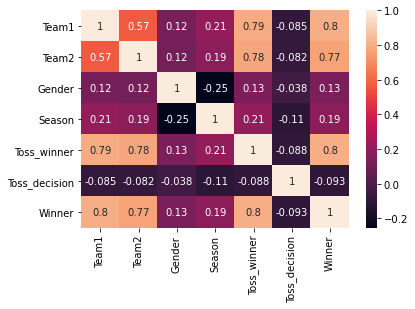

In [16]:
sns.heatmap(data=df3.drop(['Match_id','Unnamed: 0','Date','Umpire1','Umpire2',
          'Reserve_umpire','Tv_umpire','Match_referee','Neutral_venue',
          'Method','Outcome','Winner_runs','Winner_wickets','Match_number','Venue','City'], axis=1).corr(), annot=True) 

# IDENTIFYING UNIQUE TEAMS IN SEASONS

In [17]:
df3.Season.unique()

array([2016, 2017, 2018, 2019, 2006, 2005, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015], dtype=int64)

# TOTAL NUMBER OF MATCHES PLAYED EACH SEASON

In [18]:
s=df3.Season
a=print(s.value_counts())

2014    230
2016    201
2013    162
2009    148
2015    145
2010    140
2006    134
2012    128
2011    122
2007    115
2017    112
2008     90
2019     64
2005     46
2018     33
Name: Season, dtype: int64


# CREATING DATAFRAME FOR TOTAL MATCHES PLAYED IN A SEASON

In [19]:
count= {'Season':['2005','2006','2007','2008','2009','2010','2011','2012',
                 '2013','2014','2015','2016','2017','2018','2019',],
       'Total Matches played':['46','134','115','90','148','140','122','128'
                              ,'162','230','145','201','112','33','64',]}
df4=pd.DataFrame(count)
df4

,Season,Total Matches played
0,2005,46
1,2006,134
2,2007,115
3,2008,90
4,2009,148
5,2010,140
6,2011,122
7,2012,128
8,2013,162
9,2014,230


# VISUALISATION OF TOTAL MATCHES PLAYED PER SEASON

Text(0.5, 1.0, 'Total matches played per season')

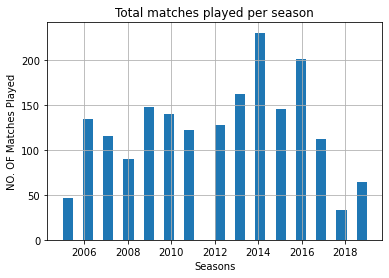

In [20]:
df3['Season'].hist(bins=30)
plt.xlabel("Seasons")
plt.ylabel("NO. OF Matches Played")
plt.title('Total matches played per season')

# VISUALISATION OF TOSS WINNING FREQUENCY BY COUNTRY CODE

Text(0.5, 1.0, 'TOSS WINNING')

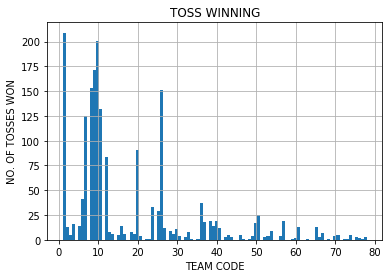

In [21]:
df3['Winner'].hist(bins=100)
plt.xlabel("TEAM CODE")
plt.ylabel("NO. OF TOSSES WON")
plt.title('TOSS WINNING')

#    # VISUALISATION OF TOTAL WINS BY COUNTRY CODE

Text(0.5, 1.0, 'MATCH WINNING')

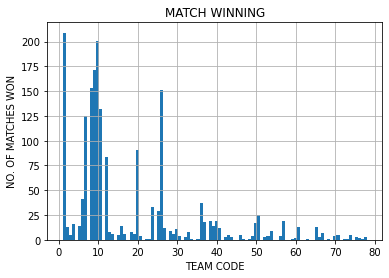

In [22]:
df3['Winner'].hist(bins=100)
plt.xlabel("TEAM CODE")
plt.ylabel("NO. OF MATCHES WON")
plt.title('MATCH WINNING')

# BUILDING PREDICTIVE MODEL , COVERT CATEGORICAL TO NUMERICAL DATASET

In [23]:
var_mod = ['City','Toss_winner','Toss_decision','Venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.head(5)

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,12,1004261,4,57,1,13-08-2016,2016,"""ICC World Cricket League Championship",25,210,...,MJG Rippon,W Barresi,BN Cooper,RE van der Merwe,T van der Gugten,Mudassar Bukhari,Ahsan Malik,PA van Meekeren,-,-
1,13,1004269,5,19,1,20-11-2016,2016,"""ICC World Cricket League Championship",32,91,...,AA Obanda,DM Gondaria,RR Patel,CO Obuya,NK Patel,Gurdeep Singh,NN Odhiambo,SO Ngoche,NM Odhiambo,LN Oluoch
2,15,1004285,2,19,1,10-09-2016,2016,Hong Kong in Scotland ODI Series,2,8,...,Aizaz Khan,Babar Hayat,Nizakat Khan,Anshuman Rath,Ehsan Khan,Shahid Wasif,Waqas Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed
3,16,1007649,6,10,1,11-06-2016,2016,India in Zimbabwe ODI Series,1,93,...,KK Nair,AT Rayudu,DS Kulkarni,BB Sran,JJ Bumrah,AR Patel,YS Chahal,-,-,-
4,17,1007651,6,10,1,13-06-2016,2016,India in Zimbabwe ODI Series,2,93,...,KK Nair,AT Rayudu,MK Pandey,BB Sran,DS Kulkarni,JJ Bumrah,AR Patel,YS Chahal,-,-


# ENCODED ENTITIES

# 1. ENCODED VALUES OF TEAM1/TEAM2/TOSS_WINNER/WINNER

{'Australia' : 1, 'Scotland' : 2, 'Papua New Guinea' : 3, 'Netherlands' : 4,'Kenya' : 5, 'Zimbabwe' : 6, 'New Zealand' : 7, 'England' : 8,
'South Africa' : 9,'India' : 10,'Pakistan' : 11,'Bangladesh' : 12,'Adelaide Strikers' : 13,'Perth Scorchers' : 14,'Sydney Thunder' : 15, 
'Brisbane Heat' : 16,'Sydney Sixers' : 17, 'Melbourne Stars' : 18, 'Hong Kong' : 19, 'West Indies' : 20,'Vanuatu' : 21, 'Maldives' : 22, 
'Saudi Arabia' : 23,'Ireland' : 24, 'Afghanistan' : 25, 'Sri Lanka' : 26, 'Malaysia' : 27, 'Denmark' : 28,'Bermuda' : 29, 
 'United States of America' : 30, 'Italy' : 31, 'Japan' : 32,'United Arab Emirates' : 33,'Thailand' : 34,'Rising Pune Supergiant' : 35,
'Mumbai Indians' : 36,'Kolkata Knight Riders' : 37,'Kings XI Punjab' : 38,'Delhi Daredevils' : 39,'Royal Challengers Bangalore' : 40,
'Sunrisers Hyderabad' : 41, 'Nigeria' : 42, 'Ghana' : 43, 'Botswana' : 44,'Sierra Leone' : 45,'Tanzania' : 46,'Qatar' : 47,'Bahrain' : 48,
'Melbourne Renegades' : 49, 'Rajasthan Royals' : 50, 'Chennai Super Kings' : 51,'Hobart Hurricanes' : 52, 'Delhi Capitals' : 53, 
'Canada' : 54, 'Africa XI' : 55,'Deccan Chargers' : 56, 'Nepal' : 57, 'Argentina' : 58, 'Cayman Islands' : 59,'Pune Warriors' : 60, 
'Singapore' : 61, 'Bhutan' : 62, 'Samoa' : 63, 'Belgium' : 64, 'Oman' : 65,'Kuwait' : 66, 'Jersey' : 67, 'China' : 68, 'South Korea' : 69, 
'Uganda' : 70, 'Namibia' : 71,'Fiji' : 72, 'Norway' : 73, 'Guernsey' : 74, 'Suriname' : 75,'Gujarat Lions' : 76,'Zambia' : 77,'Asia XI' : 78,
'Kochi Tuskers Kerala' : 79}

# > IDENTIFYING UNIQUE TEAMS IN TEAM1

In [24]:
df3.Team1.unique()

array([ 4,  5,  2,  6,  3,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 24, 25,  1, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 58, 59, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76], dtype=int64)

# >IDENTIFYING UNIQUE TEAMS IN TEAM2

In [25]:
df3.Team2.unique()

array([57, 19, 10,  5, 12,  1,  9, 26, 11,  7, 16, 13, 52, 18, 15, 49, 17,
        3,  8, 24,  2, 61, 20, 25, 31, 65, 67, 28, 68,  4, 71,  6, 34, 36,
       37, 38, 41, 76, 40, 35, 46, 45, 77, 42, 43, 66, 62, 50, 51, 14, 53,
       29, 54, 78, 33, 39, 56, 58, 30, 59, 79, 21, 32, 73, 60, 70, 74, 22,
       23, 27, 75, 72], dtype=int64)

# 2. ENCODED VALUE OF GENDER

{'Female' :  0, 'Male' : 1}

# 3. ENCODED VALUE OF TOSS_DECISION

{'Field' : 0, 'Bat' : 1}

# FEATURES GOING TO BE USED FOR PREDICTION

In [26]:
X = df3[['Team1', 'Team2','Gender','Season' ,'Toss_winner','Toss_decision','Winner']]
X

,Team1,Team2,Gender,Season,Toss_winner,Toss_decision,Winner
0,4,57,1,2016,3,0,4
1,5,19,1,2016,4,0,19
2,2,19,1,2016,1,1,2
3,6,10,1,2016,9,0,10
4,6,10,1,2016,9,0,10
...,...,...,...,...,...,...,...
1865,24,25,1,2016,23,0,25
1866,24,25,1,2016,24,1,25
1867,24,25,1,2016,24,0,24
1868,2,33,1,2016,32,0,2


# APPLYING RANDOM FORESET CLASSIFCATIONS FOR PREDICTING PLAYERS

# PLAYER_1 PREDICTION

In [27]:
y = df3[['Players_1']]
y

,Players_1
0,G Malla
1,C Carter
2,KJ Coetzer
3,PJ Moor
4,H Masakadza
...,...
1865,Mohammad Shahzad
1866,Mohammad Shahzad
1867,WTS Porterfield
1868,KJ Coetzer


# PREDICTED PLAYER_1 ALONG WITH ACCURACY

In [28]:
#I will split data 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p1=clf.predict(X_test[:1])
print("Player 1 is: "+p1)
a1=(clf.score(X_test, y_test))*100
a1=round(a1,2)
print("Accuracy of Player 1 is: ",a1,"%")

<ipython-input-28-c7fd62c1db4c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-28-c7fd62c1db4c>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 1 is: DR Smith']
Accuracy of Player 1 is:  31.02 %


# PLAYER_2 PREDICTION

In [29]:
y = df3[['Players_2']]
y.head()

,Players_2
0,AK Mandal
1,KD Shah
2,MH Cross
3,CJ Chibhabha
4,CJ Chibhabha


# PREDICTED PLAYER_2 ALONG WITH ACCURACY

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p2=clf.predict(X_test[:1])
print("Player 2 is: "+p2)
a2=(clf.score(X_test, y_test))*100
a2=round(a2,2)
print("Accuracy of Player 2 is: ",a2,"%")

<ipython-input-30-97b81b3b41c2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-30-97b81b3b41c2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 2 is: BB McCullum']
Accuracy of Player 2 is:  28.34 %


# PLAYER_3 PREDICTION

In [31]:
y = df3[['Players_3']]
y

,Players_3
0,S Vesawkar
1,Babar Hayat
2,CS MacLeod
3,H Masakadza
4,PJ Moor
...,...
1865,Rahmat Shah
1866,Rahmat Shah
1867,SP Terry
1868,CS MacLeod


# PREDICTED PLAYER_3 ALONG WITH ACCURACY

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p3=clf.predict(X_test[:1])
print("Player 3 is: "+ p3)
a3=(clf.score(X_test, y_test))*100
a3=round(a3,2)
print("Accuracy of Player 3 is: ",a3,"%")

<ipython-input-32-135498e49a1f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-32-135498e49a1f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 3 is: SK Raina']
Accuracy of Player 3 is:  26.2 %


# PLAYER_4 PREDICTION

In [33]:
y = df3[['Players_4']]
y

,Players_4
0,P Khadka
1,Nizakat Khan
2,MA Leask
3,CR Ervine
4,V Sibanda
...,...
1865,Samiullah Shenwari
1866,Samiullah Shenwari
1867,GC Wilson
1868,PL Mommsen


# PREDICTED PLAYER_4 ALONG WITH ACCURACY

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p4=clf.predict(X_test[:1])
print("Player 4 is: "+p4)
a4=(clf.score(X_test, y_test))*100
a4=round(a4,2)
a4=round(a4,2)
print("Accuracy of Player 4 is: ",a4,"%")

<ipython-input-34-090eec0a6e53>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-34-090eec0a6e53>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 4 is: F du Plessis']
Accuracy of Player 4 is:  22.73 %


# PLAYER_5 PREDICTION

In [35]:
y = df3[['Players_5']]
y

,Players_5
0,Sagar Pun
1,Anshuman Rath
2,RD Berrington
3,V Sibanda
4,Sikandar Raza
...,...
1865,Asghar Stanikzai
1866,Asghar Stanikzai
1867,KJ O'Brien
1868,MA Leask


# PREDICTED PLAYER_5 ALONG WITH ACCURACY

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p5=clf.predict(X_test[:1])
print("Player 5 is: "+p5)
a5=(clf.score(X_test, y_test))*100
a5=round(a5,2)
print("Accuracy of Player 5 is: ",a5,"%")

<ipython-input-36-66d88dca86f1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-36-66d88dca86f1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 5 is: MS Dhoni']
Accuracy of Player 5 is:  19.25 %


# PLAYER_6 PREDICTION

In [37]:
y = df3[['Players_6']]
y

,Players_6
0,R Rijal
1,Tanwir Afzal
2,CD de Lange
3,Sikandar Raza
4,E Chigumbura
...,...
1865,Najibullah Zadran
1866,Najibullah Zadran
1867,PR Stirling
1868,RD Berrington


# PREDICTED PLAYER_6 ALONG WITH ACCURACY

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p6=clf.predict(X_test[:1])
print("Player 6 is: "+p6)
a6=(clf.score(X_test, y_test))*100
a6=round(a6,2)
print("Accuracy of Player 6 is: ",a6,"%")

<ipython-input-38-20e81ddaab25>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-38-20e81ddaab25>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 6 is: RA Jadeja']
Accuracy of Player 6 is:  16.04 %


# PLAYER_7 PREDICTION

In [39]:
y = df3[['Players_7']]
y

,Players_7
0,B Bhandari
1,Nadeem Ahmed
2,CD Wallace
3,E Chigumbura
4,R Mutumbami
...,...
1865,Mohammad Nabi
1866,Mohammad Nabi
1867,SW Poynter
1868,CD de Lange


# PREDICTED PLAYER_7 ALONG WITH ACCURACY

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p7=clf.predict(X_test[:1])
print("Player 7 is: "+p7)
a7=(clf.score(X_test, y_test))*100
a7=round(a7,2)
print("Accuracy of Player 7 is: ",a7,"%")

<ipython-input-40-dbb3348dc44b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-40-dbb3348dc44b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 7 is: BW Hilfenhaus']
Accuracy of Player 7 is:  15.51 %


# PLAYER_8 PREDICTION

In [41]:
y = df3[['Players_8']]
y

,Players_8
0,Sompal Kami
1,Aizaz Khan
2,SM Sharif
3,R Mutumbami
4,AG Cremer
...,...
1865,Dawlat Zadran
1866,Rashid Khan
1867,TJ Murtagh
1868,JH Davey


# PREDICTED PLAYER_8 ALONG WITH ACCURACY

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p8=clf.predict(X_test[:1])
print("Player 8 is: "+p8)
a8=(clf.score(X_test, y_test))*100
a8=round(a8,2)
print("Accuracy of Player 8 is: ",a8,"%")

<ipython-input-42-0600029675c8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-42-0600029675c8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 8 is: IC Pandey']
Accuracy of Player 8 is:  15.24 %


# PLAYER_9 PREDICTION

In [43]:
y = df3[['Players_9']]
y

,Players_9
0,B Regmi
1,Ehsan Khan
2,MRJ Watt
3,AG Cremer
4,TL Chatara
...,...
1865,Mirwais Ashraf
1866,Mirwais Ashraf
1867,BJ McCarthy
1868,SM Sharif


# PREDICTED PLAYER_9 ALONG WITH ACCURACY

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p9=clf.predict(X_test[:1])
print("Player 9 is: "+p9)
a9=(clf.score(X_test, y_test))*100
a9=round(a9,2)
print("Accuracy of Player 9 is: ",a9,"%")

<ipython-input-44-d3b7bd514e8a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-44-d3b7bd514e8a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 9 is: MM Sharma']
Accuracy of Player 9 is:  13.37 %


# PLAYER_10 PREDICTION

In [45]:
y = df3[['Players_10']]
y

,Players_10
0,Karan KC
1,Tanveer Ahmed
2,AC Evans
3,TL Chatara
4,T Muzarabani
...,...
1865,Rashid Khan
1866,Dawlat Zadran
1867,PKD Chase
1868,AC Evans


# PREDICTED PLAYER_10 ALONG WITH ACCURACY

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p10=clf.predict(X_test[:1])
print("Player 10 is: "+p10)
a10=(clf.score(X_test, y_test))*100
a10=round(a10,2)
print("Accuracy of Player 10 is: ",a10,"%")

<ipython-input-46-ed2f281131b5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-46-ed2f281131b5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 10 is: R Ashwin']
Accuracy of Player 10 is:  12.83 %


# PLAYER_11 PREDICTION

In [47]:
y = df3[['Players_12']]
y

,Players_12
0,SJ Myburgh
1,IA Karim
2,C Carter
3,KL Rahul
4,KL Rahul
...,...
1865,WTS Porterfield
1866,WTS Porterfield
1867,Mohammad Shahzad
1868,Rohan Mustafa


# PREDICTED PLAYER_11 ALONG WITH ACCURACY

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=10)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(X, y)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test[:11])
p11=clf.predict(X_test[:1])
print("Player 11 is: "+p11)
a11=(clf.score(X_test, y_test))*100
a11=round(a11,2)
print("Accuracy of Player 11 is: ",a11,"%")

<ipython-input-48-d71ee53fa909>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
<ipython-input-48-d71ee53fa909>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


['Player 11 is: RV Uthappa']
Accuracy of Player 11 is:  33.16 %


# LIST OF ALL PREDICTED PLAYERS ALONG WITH THEIR ACCURACY AND TOTAL ACCURACY OF ALL THE PLAYERS

In [49]:
print("\033[1m" +"FINAL TEAM:-")
print("Player 1 is: "+p1)
print("Player 2 is: "+p2)
print("Player 3 is: "+p3)
print("Player 4 is: "+p4)
print("Player 5 is: "+p5)
print("Player 6 is: "+p6)
print("Player 7 is: "+p7)
print("Player 8 is: "+p8)
print("Player 9 is: "+p9)
print("Player 10 is: "+p10)
print("Player 11 is: "+p11)
print("\n")
print("\033[1m" +"ACCURACY OF ALL PLAYERS:-")
print("-> Accuracy of Player 1 is: ",a1,"%")
print("-> Accuracy of Player 2 is: ",a2,"%")
print("-> Accuracy of Player 3 is: ",a3,"%")
print("-> Accuracy of Player 4 is: ",a4,"%")
print("-> Accuracy of Player 5 is: ",a5,"%")
print("-> Accuracy of Player 6 is: ",a6,"%")
print("-> Accuracy of Player 7 is: ",a7,"%")
print("-> Accuracy of Player 8 is: ",a8,"%")
print("-> Accuracy of Player 9 is: ",a9,"%")
print("-> Accuracy of Player 10 is: ",a10,"%")
print("-> Accuracy of Player 11 is: ",a11,"%")
print("\n")
at= (a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11)/11
at=round(at,2)
print("Total Accuracy: ",at,"%")

FINAL TEAM:-
['Player 1 is: DR Smith']
['Player 2 is: BB McCullum']
['Player 3 is: SK Raina']
['Player 4 is: F du Plessis']
['Player 5 is: MS Dhoni']
['Player 6 is: RA Jadeja']
['Player 7 is: BW Hilfenhaus']
['Player 8 is: IC Pandey']
['Player 9 is: MM Sharma']
['Player 10 is: R Ashwin']
['Player 11 is: RV Uthappa']


ACCURACY OF ALL PLAYERS:-
-> Accuracy of Player 1 is:  31.02 %
-> Accuracy of Player 2 is:  28.34 %
-> Accuracy of Player 3 is:  26.2 %
-> Accuracy of Player 4 is:  22.73 %
-> Accuracy of Player 5 is:  19.25 %
-> Accuracy of Player 6 is:  16.04 %
-> Accuracy of Player 7 is:  15.51 %
-> Accuracy of Player 8 is:  15.24 %
-> Accuracy of Player 9 is:  13.37 %
-> Accuracy of Player 10 is:  12.83 %
-> Accuracy of Player 11 is:  33.16 %


Total Accuracy:  21.24 %


# ACCURACY TESTED BY OTHER ALGORITHMS

In [50]:
print("\033[1m"+"RANDOM FOREST CLASSIFICATION = ",at,"%")
print("\n")
print("LOGISTIC REGRESSION = 15.1%")
print("\n")
print("K-NEIGHBOUR CLASSIFICATION (KNN) = 18.2%")
print("\n")
print("SUPPORT VECTOR MACHINE CLASSIFICATION (SVM) = 13.4%")
print("\n")
print("DECISION TREE CLASSIFICATION = 14.4%")
print("\n")
print("NAVE BYES CLASSIFICATION = 16.1%")

RANDOM FOREST CLASSIFICATION =  21.24 %


LOGISTIC REGRESSION = 15.1%


K-NEIGHBOUR CLASSIFICATION (KNN) = 18.2%


SUPPORT VECTOR MACHINE CLASSIFICATION (SVM) = 13.4%


DECISION TREE CLASSIFICATION = 14.4%


NAVE BYES CLASSIFICATION = 16.1%
